### Формулирование задачи
Отток клиентов является одной из главных проблем любой компании. Под оттоком клиентов понимается прекращение оплаты услуг или прекращение использования продукта компании. Процент клиентов, которые прекращают использовать продукт в течение определенного времени называется коэффициентом оттока клиентов. И если большая часть клиентов перестанет использовать продукт, то это сильно скажется на материальных потерях компании.

Основной идеей задачи является построение модели, которая будет предсказывать отток клиентов, использую предоставленные данные кредитной организации.

#### Входные данные
* RowNumber - номер строки;
* CustomerId - уникальный идентификатор клиента;
* Surname - клиент;
* Credit Score - кредитный рейтинг;
* Geography - страна, где находится клиент;
* Gender - половой признак;
* Age - возраст клиента;
* Tenure - стаж на последнем месте работы;
* Balance - остатки на всех счетах клиента, имеющихся в банке;
* NumOfProducts - количество продуктов у клиента;
* HasCrCard - признак наличия у клиента кредитной карты;
* IsActiveMember - признак активности пользователя;
* EstimatedSalary - заработная плата клиента;
* Exited - признак того, покинул клиент банк или нет

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# настройка параметров визуализации
sns.set_theme(
    context={'font.size': 9},
    style='whitegrid'
)

In [3]:
data = pd.read_csv(r'data\Churn Modeling.csv').drop(columns='RowNumber')

#### Первичный анализ данных
Проведем первичный анализ данных. Т.е. пробежимся глазами по данным и попробуем выявить в них какие-то особенности.

Сразу наблюдается, что у нас есть столбец `RowNumber`, который не несет никакой смысловой нагрузки. Поэтому удалим его на первоначальном этапе загрузки данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
data.isna().any(axis=1).all()

False

Отлично, данные не содержат пустых значений, также мы можем увидеть типы данных.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


Беглым взглядом мы можем обратить внимание на следующие вещи (выделим основные):
* скоринговый балл (он же кредитный рейтинг) принимает значение от 350 до 850;
* возраст наших клиентов от 18 до 92 лет;
* стаж работы наших клиентов принимает значения от 0 до 10, что является вполне логичным, т.к. возможно восемнадцатилетние клиенты являются студентами, но имеют счет в банке. Позже мы еще более подробно посмотрим на это;
* также можем обратить внимание, что в данных имеются клиенты с пустым балансом (остатки на счетах клиента равны 0);
* у каждого клиента имеется хоть один продукт, что является вполне логичным;
* встречаются клиенты, которые не имеют кредитной карты, но не меньше половины всех клиентов имеют кредитную карту (это можно увидеть, взглянув на пятидесятипроцентный персентиль);
* также можно сделать вывод, что не меньше половины всех клиентов являются активными (также обращая внимание на пятидесятипроцентный персентиль);
* минимальная заработная плата в анализируемых данных - `$11.58`, что является странным, но здесь все же можно найти логику если посмотреть на распределение наименьших зарплат в разрезе возраста. Есть предположение, что это клиенты не имеющие опыта работы. Возможно, это студенты, имеющие подработку. Позже мы также посмотрим на это более подробно.

In [7]:
print('Всего пользователей:', data.shape[0])
print('Уникальных пользователей:', data['CustomerId'].nunique())

Всего пользователей: 10000
Уникальных пользователей: 10000


Логично, что одна строка содержит одного пользователя, т.к. параметры таблицы описывают различную информацию о клиенте. Но все же стоит убедиться, что все представленные клиенты в срезе данных имеются в уникальном виде (т.е. не дублируются).

Ранее у нас было предположение, что клиенты с отсутствием трудового стажа являются достаточно молодыми. Казалось бы как данное предположение может повлиять на будущую модель, но таким скорым анализом мы проверяем согласованность данных (т.е. имеют ли наши данные логику). В противном случае в любых данных может присутствовать факт искажения.

In [16]:
data.query('Tenure==0')['Age'].nunique(), data.query('Tenure==0').shape[0]

(54, 413)

Мы получили достаточно большое число уникальных возрастных оценок не имеющих трудового стажа. Попробуем построить график, чтобы более наглядно посмотреть как распределены безработные по возрасту.

Т.к. у нас большое кол-во уникальных возрастных категорий, при этом клиентов без опыта работы также большое кол-во, то перед построением графика попробуем применить логическую группировку к этим данным.

In [31]:
# копируем данные о безработных в отдельный DataFrame
unemployed_data = data.query('Tenure==0').copy()
# разбиваем данные на категории
unemployed_data['categories_age'] = pd.cut(
    unemployed_data['Age'],
    bins=[data['Age'].min()-1, 20, 25, 30, 35, 40, 45, 50, data['Age'].max()+1]
)

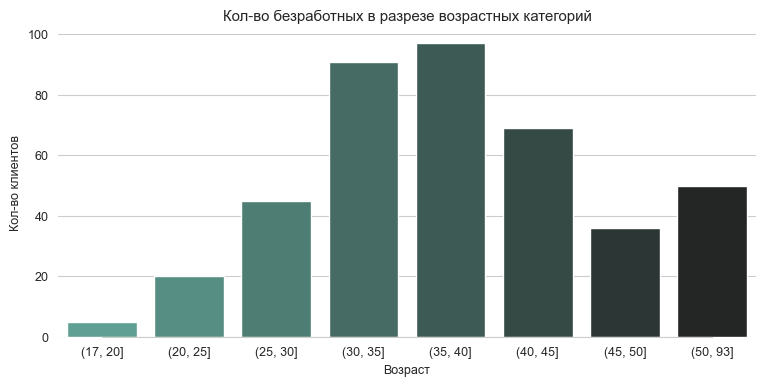

In [59]:
fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.countplot(x='categories_age', data=unemployed_data, palette='dark:#5A9_r' ,ax=ax)
ax.set_title('Кол-во безработных в разрезе возрастных категорий')
ax.set_xlabel('Возраст')
ax.set_ylabel('Кол-во клиентов')
sns.despine(fig=fig, ax=ax, left=True, trim=True)
plt.show()

Оус, наши предположения оказались неверными. Оказывается большое количество клиентов, не имеющих трудового стажа принадлежат категориям `30-35` и `35-40`, а также `40-45`. При этом видим также большое кол-во клиентов в категории `50+`. А вот в категориях `до 25` клиентов не так уж и много.

Наше прежнее предположение было ложным.

Опираясь на визуальное представление данных можно осмелиться предположить, что это стаж работы на предыдущем месте. И клиенты в статусе `безработный` длительный срок имеют трудовой стаж равный 0. В таком случае у таких клиентов должна отсутствовать заработная плата. Посмотрим визуально на график зависимости заработной платы от возраста для безработных клиентов.

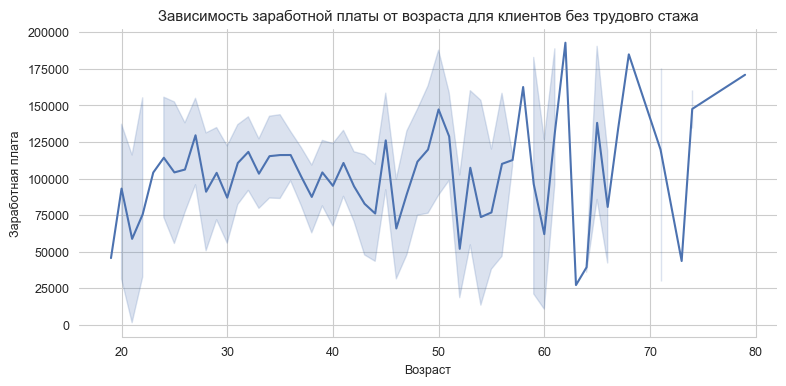

In [102]:
fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.lineplot(x='Age', y='EstimatedSalary', data=unemployed_data, palette='dark:#5A9_r', ax=ax)
ax.set_title('Зависимость заработной платы от возраста для клиентов без трудовго стажа')
ax.set_xlabel('Возраст')
ax.set_ylabel('Заработная плата')
sns.despine(fig=fig, ax=ax, left=True, trim=True)
plt.show()

В очередной раз наше предположение оказалось ложным. Можем обратить внимание, что клиенты без трудового стажа в любом возрасте имеют заработную плату. Это выглядит достаточно странно. Мы можем предположить, что такие клиенты являются инвесторами, но к сожалению в рамках ограниченных данных мы не можем прийти к однозначному выводу, почему мы получили такие результаты.

Попробуем посмотреть на клиентов с нулевыми остатками на счетах.

In [68]:
data[data['Balance']==0].shape

(3617, 13)

Можем предположить, что такие клиенты получают заработную плату на карту кредитной организации, но переводят денежные средства в на другую карту, либо же используют наличные. Позже мы еще посмотрим зависимость оттока клиента от баланса.

Ранее мы обнаружили в данных достаточно низкую заработную плату в `$11.58`. Попробуем посмотреть на такие выбросы. Для этого, отсечем некоторых клиентов.

In [86]:
# посмотрим на квантили заработной платы с шагом в 0.01
for x in range(1, 5+1):
    print('Quantile {:0.2}:'.format(x/100), round(data['EstimatedSalary'].quantile(x/100), 2))

Quantile 0.01: 1842.83
Quantile 0.02: 3769.45
Quantile 0.03: 5811.3
Quantile 0.04: 8064.78
Quantile 0.05: 9851.82


Однопроцентный квантиль содержит вполне более адекватные данные. В таком случае попробуем сделать экспертную оценку и ограничим данные с заработной платой, не превышающей `$500`.

In [97]:
min_salary_data = data[data['EstimatedSalary'] <= 500].copy()

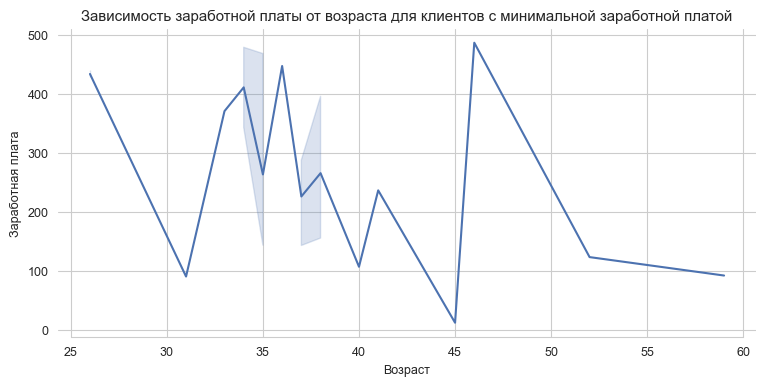

In [103]:
fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.lineplot(x='Age', y='EstimatedSalary', data=min_salary_data, palette='dark:#5A9_r', ax=ax)
ax.set_title('Зависимость заработной платы от возраста для клиентов с минимальной заработной платой')
ax.set_xlabel('Возраст')
ax.set_ylabel('Заработная плата')
sns.despine(fig=fig, ax=ax, left=True, trim=True)
plt.show()

И здесь наше предположение оказалось ложным. Наименьшую заработную плату получает клиент в возрасте 45 лет, но в целом по графику заработная плата не опускается ниже `$100`. Посмотрим на этого клиента.

In [108]:
print(data[data['EstimatedSalary']==data['EstimatedSalary'].min()].T)

                      2362
CustomerId        15791053
Surname           Lucciano
CreditScore            709
Geography          Germany
Gender                Male
Age                     45
Tenure                   4
Balance          122917.71
NumOfProducts            1
HasCrCard                1
IsActiveMember           1
EstimatedSalary      11.58
Exited                   1


На первый взгляд бросается в глаза высокий уровень остатка на счете и высокий скоринговый балл. Для такой заработной платы это является странным. Но такой клиент один, пока оставим его. В дальнейшем мы еще посмотрим влияет ли уровень заработной платы на отток клиентов.